# The Parametric Information Bottleneck Algorithm

In this notebook the parametric information bottleneck algorithm is presented. This algorithm is described in detail in the paper:

[SLB19] M. Stark, J. Lewandowsky, and G. Bauch, “A Parametric Information Bottleneck Algorithm for Gaussian Random Variables and Gaussian Mixtures,” in 12th International ITG Conference on Systems, Communications and Coding 2019 (SCC’2019), Rostock, Germany, 2019.

This paper allows to reproduce all simulation results shown in the paper.

In [13]:
import sys,os
sys.path.append('../..')

from scipy.stats import norm
from information_bottleneck.information_bottleneck_algorithms.ParamIB_class import ParamIB
from Exampled.helper_functions import *
import time
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

# Construct Jointly Gaussian Input Distribution

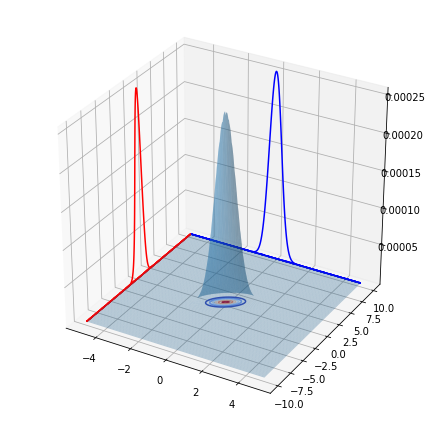

In [17]:
card_Y = 1000
card_X = 500
card_T = 16

EbN0 = 5
EbN0_lin = 10 ** (EbN0 / 10)
sigma_n2 = 1 / (EbN0_lin)

sigma_x2 = 0.2
mean_x = 0
AD_max_abs_y = 10
AD_max_abs_x = 5
x_vec = np.linspace(-AD_max_abs_x, AD_max_abs_x, card_X)
delta_x =  x_vec[1] - x_vec[0]
p_x = norm.pdf(x_vec, loc=mean_x, scale=np.sqrt(sigma_x)) * delta_x
p_x[-1] += gaussian_over_prob(AD_max_abs_x, mean_x, sigma_x2, delta_x)
p_x[0] += gaussian_under_prob(-AD_max_abs_x, mean_x, sigma_x2, delta_x)
p_x /= p_x.sum()


# assume Y ~ N(0,sigma_N)
y_vec = np.linspace(-AD_max_abs_y, +AD_max_abs_y, card_Y)
delta_y = y_vec[1] - y_vec[0]

p_x_y = np.zeros((card_Y,card_X))

p_y_given_x =np.zeros( (card_Y, card_X ) )
for i in range(card_X):
    p_y_given_x[:,i] = norm.pdf(y_vec, loc=x_vec[i], scale=np.sqrt(sigma_n2)) * delta_y
    p_y_given_x[-1,i] += gaussian_over_prob(AD_max_abs_y, x_vec[i], sigma_n2, delta_y)
    p_y_given_x[0,i] += gaussian_under_prob(-AD_max_abs_y, x_vec[i], sigma_n2, delta_y)

p_x_y = p_x * p_y_given_x
p_y = p_x_y.sum(axis=1)
p_x_given_y = p_x_y / p_y[:,np.newaxis]

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.gca(projection='3d')

X, Y = np.meshgrid(x_vec, y_vec)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, p_x_y, zdir='z', offset=0, cmap=cm.coolwarm)
cset = ax.contour(X, Y, p_x_y, zdir='x', offset=-AD_max_abs_x , colors  = 'r')
cset = ax.contour(X, Y, p_x_y, zdir='y', offset=AD_max_abs_y, colors  = 'b')

# Compute Parameters of Posterior Distribution

In [18]:
# compute posterior mean and posterior variance from p(y|x)
mu_x_given_y = mean_x + sigma_x2 / (sigma_n2+sigma_x2) * (y_vec - mean_x)
sigma_x_given_y = (sigma_n2*sigma_x2) / (sigma_n2+sigma_x2)

In [20]:
nror = 10
IB_inst_ParamIB = ParamIB(p_x_y,card_T,mu_x_given_y,sigma_x_given_y,x_vec,sigma_x,nror=nror)
IB_inst_ParamIB.run_IB_algo()
IB_inst_ParamIB.display_MIs()

 [Elapsed Time: 0:00:03] |###################################| (Time: 0:00:03) 


Winner finished in  51.0  iterations.
Average number of iterations to finished: 54.9
----- Mutual Information Comp --- 
-----  KL means IB  ------ 
MI_XT_s=  0.348588345422
MI_XY_s=  0.353521846701
ratio=  0.986044706075
